# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [16]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [17]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [19]:
# Q1: how to get 2 columns from the dataframe (city and country)?
dfcc = df[["city","country"]]

In [83]:
dftest = df[0:4]
dftest

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [35]:
# Q2: how to get the first 5 rows of the "city" column?
df.iloc[0:5,3]

0    West Drayton
1          Lisbon
2          Lisbon
3          Lisbon
4          Lisbon
Name: city, dtype: object

### Using .loc[ ]

In [20]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[3]

lat               51.478199
lon               -0.446081
date       05/14/2014 11:24
city               Hounslow
country      United Kingdom
Name: 3, dtype: object

In [81]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0,"country"]

'United Kingdom'

In [79]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[0:3,["city","date"]]

,city,date
0,West Drayton,05/14/2014 09:07
1,Lisbon,05/14/2014 15:11
2,Lisbon,05/14/2014 16:40
3,Lisbon,05/14/2014 18:25


### Using .iloc[ ]

In [23]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3,2]

'05/14/2014 11:24'

In [24]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[300]

lat               41.377091
lon                2.151175
date       05/20/2014 03:18
city              Barcelona
country               Spain
Name: 300, dtype: object

## Part 2 <br /> How to select rows by some value(s)

In [73]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [74]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
#munich = df[(df['city']== 'Munich')]

In [75]:
#df['Munich'] = np.where(df['city']== 'Munich', True, False)
df['city']=='Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [76]:
df[df['city']=='Munich']

,lat,lon,date,city,country
177,48.35711,11.791346,07/09/2014 13:20,Munich,Germany


In [77]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 

df[(df['country']=='Spain') & ~(df['city']=='Barcelona')]


,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [78]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df['city']=='Munich') | (df['country']=='Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [84]:
df

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal
...,...,...,...,...,...
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey


In [85]:
# Q12: how many observations are west of the prime meridian? 
# where longitude is less than 0

len(df[df['lon'] < 0])

24

In [94]:
# Q13: get all rows that contain a city that starts with the letter G
row_G = df[df['city'].str.startswith('G')]
row_G
# or 
row_Gagain= df['city'].str.startswith('G')
df[row_Gagain]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [101]:
# Q14: how many unique cities and countries in the dataset? 

len(df.city.unique())


91

In [100]:
# Also can you check missing values for the dataframe

df.isnull().sum()

lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [17]:
# Q15: group by country name and show the city names in each of the country

## Part 3 <br /> How to select based on a date-time values

In [102]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [108]:
dt.index.unique()

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:38:00',
               '2014-05-14 12:23:00', '2014-05-14 12:38:00',
               '2014-05-14 15:11:00', '2014-05-14 15:25:00',
               '2014-05-14 15:41:00', '2014-05-14 15:55:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1749, freq=None)

In [103]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [105]:
len(dt)

1750

In [111]:
# Q17: drop duplicate index 
dt.drop_duplicates(inplace = True)


In [112]:
len(dt)

1750

In [122]:
# Q18: create a weekday and a weekend dataframe
# the .weekday attribute determines which day of the week a date is
# 6 is sunday and 0 is monday
weekend = dt[(dt.index.weekday==5) | (dt.index.weekday==6)]
weekend

,lat,lon,city,country
date,,,,
2014-05-17 00:09:00,38.711824,-9.137308,Lisbon,Portugal
2014-05-17 00:39:00,38.711833,-9.137317,Lisbon,Portugal
2014-05-17 01:09:00,38.711822,-9.137277,Lisbon,Portugal
2014-05-17 01:39:00,38.711823,-9.137273,Lisbon,Portugal
2014-05-17 01:54:00,38.711828,-9.137279,Lisbon,Portugal
...,...,...,...,...
2014-07-06 22:12:00,41.040212,28.988639,Istanbul,Turkey
2014-07-06 22:27:00,41.043491,28.985364,Istanbul,Turkey
2014-07-06 23:12:00,41.043476,28.985419,Istanbul,Turkey


In [121]:
weekday = dt[(dt.index.weekday==0) | (dt.index.weekday==1) | (dt.index.weekday==2) | (dt.index.weekday==3 ) | (dt.index.weekday==4)]
weekday

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom
2014-05-14 12:23:00,51.480146,-0.441103,Hounslow,United Kingdom
...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany


<Axes: title={'center': '# of observations each day of the week'}, xlabel='date'>

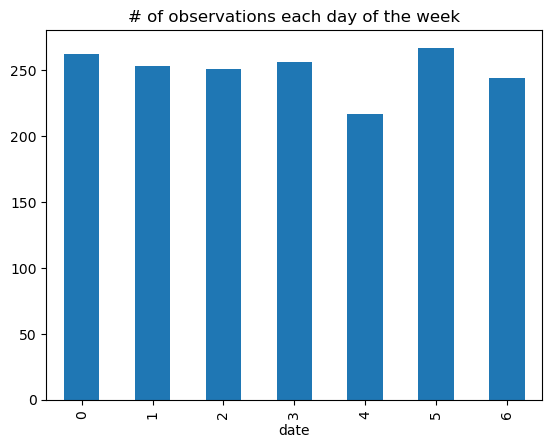

In [124]:
# Q19: calculate and plot the number of observations each day of the week has
observations_daily = dt.groupby(dt.index.weekday).size()
observations_daily.plot(kind='bar', title='# of observations each day of the week')
